## AML Lab 1 | Data Preprocessing
### Priya Bannur (1032170692)
28/11/2020

##### 1. Importing Python Modules/Libraries

In [1]:
import numpy as np                                   # Data manipulation
import pandas as pd                                  # Data manipulation
from sklearn.preprocessing import LabelEncoder       # Label encoding
from sklearn.impute import SimpleImputer             # Handling missing data
from sklearn.model_selection import train_test_split # Splitting data
from sklearn.preprocessing import Normalizer         # Data normalization
import seaborn as sns                                # Data visualization
import matplotlib.pyplot as plt                      # Data visualization

###### 2. Importing data  &   3. Displaying data

In [2]:
df=pd.read_excel('hospital.xlsx')             # Importing dataset from file
df.head()                                     # Displaying first 5 records

,Qualification,Experience,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


###### 4. Describing the values of data

In [3]:
df.shape                           # Dimension of the dataset (rows, colums)

(5961, 6)

In [4]:
df.info()                          # Summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   int64 
 2   Place               5936 non-null   object
 3   Profile             5961 non-null   object
 4   Miscellaneous_Info  3341 non-null   object
 5   Fees                5961 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 279.5+ KB


##### 5. Creating the Independent and Dependent variables

In [5]:
X=df.iloc[:,0:-2]                  # X independant
Y=df.iloc[:,-1]                    # Y dependant

In [6]:
X.head()

,Qualification,Experience,Place,Profile
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",Homeopath
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",Ayurveda
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",ENT Specialist
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",Ayurveda
4,BAMS,20,"Keelkattalai, Chennai",Ayurveda


In [7]:
Y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

###### 6. Handling Missing data

In [8]:
X.isnull().sum()            # Checking which columns have null values  

Qualification     0
Experience        0
Place            25
Profile           0
dtype: int64

In [9]:
Y.isnull().sum()

0

In [10]:
# SimpleImputer class for imputation
imp=SimpleImputer(strategy='most_frequent')
X=imp.fit_transform(X)
X=pd.DataFrame(X)
X.isnull().sum() 

0    0
1    0
2    0
3    0
dtype: int64

##### 7. Encoding categorical data

In [11]:
le=LabelEncoder()          # Encoding Profile Information into Integers
X.iloc[:,-1]=le.fit_transform(X.iloc[:,-1])

In [12]:
le.classes_

array(['Ayurveda', 'Dentist', 'Dermatologists', 'ENT Specialist',
       'General Medicine', 'Homeopath'], dtype=object)

In [13]:
X.head()

,0,1,2,3
0,"BHMS, MD - Homeopathy",24,"Kakkanad, Ernakulam",5
1,"BAMS, MD - Ayurveda Medicine",12,"Whitefield, Bangalore",0
2,"MBBS, MS - Otorhinolaryngology",9,"Mathikere - BEL, Bangalore",3
3,"BSc - Zoology, BAMS",12,"Bannerghatta Road, Bangalore",0
4,BAMS,20,"Keelkattalai, Chennai",0


##### 8. Splitting the data into training and test set

In [14]:
# 70% Train data, 30% Test data
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=1)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(4172, 4) (1789, 4) (4172,) (1789,)


##### 9. Feature Scaling / Data Normalization

In [15]:
data=[X.iloc[:,1]]

n_max=Normalizer(norm='max')             # Max normalizer
n_max.fit_transform(data)

array([[0.36363636, 0.18181818, 0.13636364, ..., 0.62121212, 0.22727273,
        0.25757576]])

In [16]:
n_l=Normalizer(norm='l1')                # L1 normalizer
n_l.fit_transform(data)

array([[2.32673123e-04, 1.16336562e-04, 8.72524213e-05, ...,
        3.97483252e-04, 1.45420702e-04, 1.64810129e-04]])

In [17]:
n_l2=Normalizer(norm='l2')               # L2 normalizer
n_l2.fit_transform(data)

array([[0.01510392, 0.00755196, 0.00566397, ..., 0.02580253, 0.00943995,
        0.01069861]])

##### 10. Data Visualization

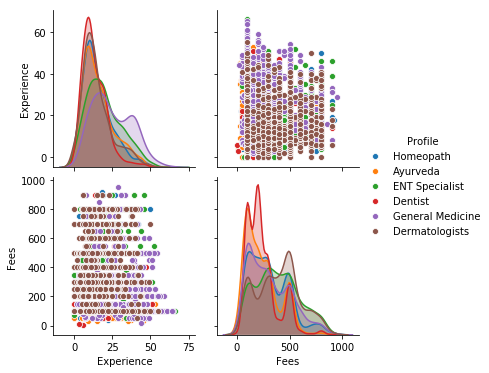

In [18]:
sns.pairplot(df, hue="Profile")          # Pair plot EXPERIENCE vs FEE

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


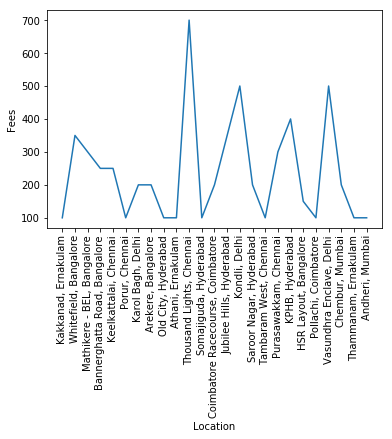

In [19]:
plt.plot(X.iloc[0:25,-2], Y.iloc[0:25])         # Line Graph
plt.ylabel("Fees")
plt.xlabel("Location")
plt.xticks(rotation=90)
plt.show()

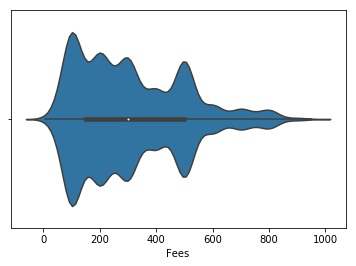

In [20]:
sns.violinplot(Y)   # Violin Plot = Box plot + Kernel Density Estimation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

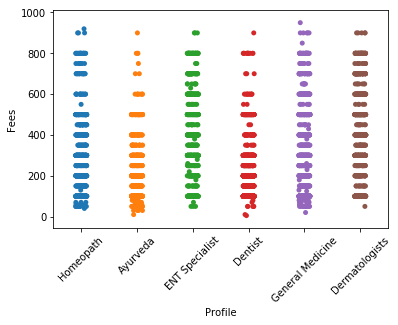

In [21]:
# Strip Plot: A scatterplot where one variable is categorical
g=sns.stripplot(x='Profile',y='Fees',data=df)
plt.xticks(rotation=45)